In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train1=x_train/255.0
x_test1=x_test/255.0


In [3]:
print(x_train1.shape)

(60000, 28, 28)


In [4]:
model=Sequential()
model.add(SimpleRNN(128, input_shape=(28,28),return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(128))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))


model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-12-12 19:58:05.757338: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-12 19:58:05.757641: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 28, 128)           20096     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

In [5]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [6]:
model_history = model.fit(x_train1,y_train,epochs=3,validation_data=(x_test1,y_test))

Epoch 1/3


2022-12-12 19:58:06.560423: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-12 19:58:06.886951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  71/1875 [>.............................] - ETA: 16:04 - loss: 2.0671 - accuracy: 0.2663

In [ ]:
scores=model.evaluate(x_test,y_test,verbose=0)
print("Accuracy: %.2f%%" %(scores[1]*100))
# loss, accuracy = model.evaluate(x_test, y_train,verbose=0 )
# print("Training Accuracy : ", format(accuracy))


Accuracy: 13.61%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


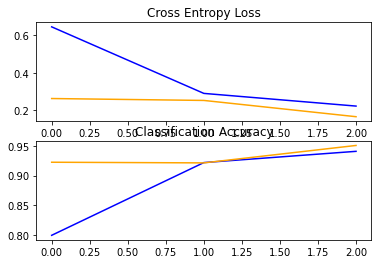

In [ ]:
# plot loss
print(model_history.history.keys())
history_dict= model_history.history
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history_dict['loss'], color='blue', label='train')
plt.plot(history_dict['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history_dict['accuracy'], color='blue', label='train')
plt.plot(history_dict['val_accuracy'], color='orange', label='test')
plt.show()

In [ ]:
#implementing LSTM

model2=Sequential()
model2.add(LSTM(128, input_shape=(28,28),return_sequences=True))
model2.add(Dropout(0.2))

model2.add(LSTM(128))
model2.add(Dropout(0.2))

model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10,activation='softmax'))


model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_9 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model2_history = model2.fit(x_train1,y_train,epochs=3,validation_data=(x_test1,y_test))

Epoch 1/3
1875/1875 [==============================] - 164s 86ms/step - loss: 1.9019 - accuracy: 0.3340 - val_loss: 1.2382 - val_accuracy: 0.6222
Epoch 2/3
1875/1875 [==============================] - 155s 83ms/step - loss: 0.9638 - accuracy: 0.6700 - val_loss: 0.5428 - val_accuracy: 0.8311
Epoch 3/3
1875/1875 [==============================] - 158s 84ms/step - loss: 0.5330 - accuracy: 0.8307 - val_loss: 0.3093 - val_accuracy: 0.9012


In [ ]:
scores=model2.evaluate(x_train1,y_train,verbose=0)
print("Accuracy: %.2f%%" %(scores[1]*100))
scores

Accuracy: 9.51%


[2.3039028644561768, 0.09513333439826965]

how to load CIFAR10
implement cnn in this program
